# Case Study: Cyclistic

## Case Background

As a junior data analyst working for Cyclistic in the marketing analyst team, I am tasked to understand how do annual members and casual riders differentiate when using Cyclistic bikes. Casual riders are customers that purchase single-ride or full-day passes, whereas annual members have a yearly subscription for unlimited biking access. As part of the analysis we would try to figure out how we could convert casual riders into annual members. 

The scope of the project would give the stakeholders the insights on the data for data-driven decision-making on the new Cyclistic's marketing strategy. 


# Scope of Work

During the analysis we would be going through the following phases and completing the following tasks

###
| Phases | Tasks |
| :-: | :- |
| 1. Define the project and goals | <ul><li>Producing a scope of work document</li><li>Framing a problem statement</li><li>Defining project goals and the measurements to define success by discussing the project with stakeholders and ascertaining expectations</li></ul>|
| 2. Extract and prepare the data | <ul><li>Identifying the data location and its structure</li><li>Determining if the data "ROCCC" (Realibility, Origin, Comprehensiveness, Current relevance and Cited)</li><li>Addressing license, privacy, security and accesibility issues</li><li>Verifying the data's integrity</li><li>Identifying how does the data answer our businness question</li></ul>|
| 3. Process data for analysis | <ul><li>Defining the tools to use for the analysis</li><li>Checking for dirty data and ensuring data's integrity</li><li>Verifying data is clean and ready for analysis</li><li>Documenting the cleaning process</li></ul> |
| 4. Analyze the data | <ul><li>Organizing the data for analysis</li><li>Identifying trends and relationships and surprise elements</li><li>Provide a summary of the analysis</li></ul> |
| 5. Sharing the key findings through visuals | <ul><li>Determining the best way to share the key findings to answer the business question</li><li>Create data visualizations to easily present the findings</li><li>Ensure the work performed is available and accesible for stakeholders</li></ul> |
| 6. Act based on the findings | <ul><li>Provide three actions to take as a marketing strategy based on the key findings </li></ul> |
    


## 1. Define the problem and goals

### Business Background

Business Model

- Product: Bike-share program and bikes network accross Chicago
- Customer and revenue model: Annual members (subscription) and casual riders (single-ride and full-day purchases)
- Competitive advantage: Bicycle variety with inclusive models for people with disabilities and riders who can't use the standard two-wheeled bike.

Product Background

- Over 6000 bikes and 600 docking stationns across Chicago.
- Most riders opt for tradicional bikes
- 8% of riders use the assiptive options
- Cyclist bycicles are mostly used for leisure. Around 30% use them to go to work.


### Problem Statement

Cyclist has already been settled as an option to move throughout the city in Chicago. To be able to further grow they need to implement new marketing strategies. Lily Moreno, the Director of Marketing believes that Cyclistic should capitalize on maximizing the number of annual members. To do so, Moreno believes the best marketing strategy should focus on converting casual riders (already aware of the advantages of Cyclist) into annual members. 
To make a data-driven decission on the best marketing strategy, we need to analyze how Cyclist casual users differ from annual members and why the choose that option. 

### Goals and expectations

| Stakeholders | Expectations | Business goals |
| :- | :- | :- |
| Lily Moreno, Director of marketing | Evidence to support a marketing strategy | Develop a marketing campaign to improve te bike-sharing membership program | 
| Cyclistic marketing analytics team | To uncover the differences between the customer types and the motives to use the different kind of models | Define the best actions to convert casual riders into annual members |  
| Cyclistic Executive Team | Compelling, relevant and straighforward insights to inform detailed data-driven decisions | To approve and implement the best marketing strategy for business growth | 

## 2. Extract and prepare the data

### Data Source and Organization

The data that we will be using was extracted from [here](https://divvy-tripdata.s3.amazonaws.com/index.html). This data is made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement). (Note: Cyclist is a fictional company and the dataset is used only for the purpose of this study).

The extracted data is made up of quantitative measurements collected over time divided in monthly packages. Each data point represents a trip for a docking station to another. 

The data does not contain any qualitative measurement. A survey on casual riders and annual members could be very useful to understand  **why** they use Cyclist. It would be very useful to know whether casual riders also use some other platforms with their casual rides and compare the services. I would propose to conduct this surveys to the riders.

While that survey may or may not happen, we move forward to the analysis of the quantitative data. Quantitative data can also provide trends that helps identify the motives.

We will be examining a period of 12 months, from the start of June 2021 to the end of May 2022. Every month data is stored in a CSV file with the same headings. Every record represents a trip with the keys: a unique ID (primary key), type of bike, type of customer, DateTime for when the bike was picked up and dropped off and starting and ending docking station details(name, ID, latitude and longitude).

### Preparing the data

#### Setting up libraries

In [1]:
import numpy as np                                ## basic algebra functions
import pandas as pd                               ## data manipulation
from shapely.geometry import Point                ## Plotting in a map.
import matplotlib.pyplot as plt                   ## plotting module  
import geopandas as gpd                           ## geographical visualizations
from geopandas import GeoDataFrame                ## Using our dataframe to plot
import glob                                       ## pathnames
import os                                         ## path file handling
from datetime import date, datetime, timedelta    ## to deal with dates and times


#### Loading and merging the datasets

In [2]:
# We will be using os for the path handling of our files. They are stored in a subforder called CSV.
local_path = os.getcwd() + '\CSV'

# Since we only have the desired files in the subfolder let's read them all.
filenames = glob.glob(local_path + "/*.csv")

dfs = [pd.read_csv(f) for f in filenames]
# We know that fields "started_at" and "ended_at" are datetime datatype fields. We should use the following code chunk instead:
# dfs = [pd.read_csv(f, parse_dates=["started_at", "ended_at"] ) for f in filenames]
# However, since we might not know this for now, let's use the basic code and reformat later on.

# Let's combine all of the df into a global one
df = pd.concat(dfs,ignore_index=True)

# This wouldn't be necessary for our analysis, but we will save the merged CSV file for future uses.
df.to_csv('2022-june-year-divvy-tripdata.csv')

#### Data preview

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member


Let's order it by start_station_name to get a look at the information contained in it.

In [4]:
sorted_df = df.sort_values(by='start_station_name')
sorted_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5467026,37A6412C492BA13D,electric_bike,2022-05-13 17:14:27,2022-05-13 17:23:41,111th St - Morgan Park Metra,682,NaN,NaN,41.690000,-87.670000,41.69000,-87.690000,member
5716839,E821E779F578FAD1,electric_bike,2022-05-13 15:04:52,2022-05-13 15:11:24,111th St - Morgan Park Metra,682,Walden Pkwy & 103rd St,693,41.690000,-87.670000,41.71000,-87.670000,member
5467025,3C6EA90051295365,electric_bike,2022-05-12 17:50:44,2022-05-12 17:58:23,111th St - Morgan Park Metra,682,NaN,NaN,41.690000,-87.670000,41.69000,-87.690000,member
5466972,54932094E964F02A,electric_bike,2022-05-09 16:50:29,2022-05-09 16:57:23,111th St - Morgan Park Metra,682,NaN,NaN,41.690000,-87.670000,41.70000,-87.680000,member
4127751,B67009AFED601547,electric_bike,2021-12-29 18:05:59,2021-12-29 18:15:09,2112 W Peterson Ave,KA1504000155,Clark St & Elmdale Ave,KA1504000148,41.991154,-87.683623,41.99086,-87.669724,member


At first glance we can see that all columns will be important to our analysis. The data will allow us to look for trends on the trip duration, distance, type of bike used comparing both kind of users.

On the other hand, we can already see some null values in the fields 'start_station_name', 'start_station_id', 'end_station_name' and 'end_station_id' to look for when processing the data.

### Data Quality 

Before preparing the data, we should get to know our data and check for its quality. We would look at the features for an analysis standard (ROCCC):
- Reliability:
| Reliability issues | Description |
| :-: | :- |
| Data validity | The data is raw and it does not have many constraints. There are end datetimes recorded at the same second as starting datetimes. Moreover, the accuracy for latitude and longitude vary for every record. |
| Incomplete data | Depending on the month review it can have up to 40% of rows with null data. |

- Original: 

The data was extracted from the data source provided by a first-party group (Motivate International Inc.). There were not unknown, nor any third party interventions.

- Comprehensiveness:

The data set is quite easy to understand. All the keys and the structure is very comprehensive.

- Current: 

We have downloaded the last reports with the last month updates. We do not have access to the very last month report but because it is still getting collected.

- Cited:

The dataset is collected by Motivate International Inc. and we have extracted the public open data they provide.


### Licensing, privacy, security and accesibility

- The data has been extracted by the open-source provided by Motivate International Inc. under this [license terms](https://ride.divvybikes.com/data-license-agreement). 

- There are no private information stored in the open data, the rides are identified by an unique ID key, and there are no personally identifiable information (AWS).

- Data is in a cloud repository that is managed by Motivate International Inc. and secured by a trusted well-known cloud services provider.

- All of Cyclistic's bike ride records can be accessed and are open to the public. 

### Data consistency and integrity

There are some inconsistencies on the data, like trip durations of over a day, even for casual users. 

Also, it seems like the accuracy when measuring the coordenates vary between records. 

When processing the data we would need to look at this elements. 

## 3. Process data for analysis

### Choosing the right tools

First of all we will take a look at the weight for the entire dataset.

In [5]:
# we want to know the amount of rows and the weight of the dataframe.
# first let's get the number of rows.
rows = df.size/13

# now let's get the weight of the complete csv file in Megabytes.
weight = round(os.stat('2022-june-year-divvy-tripdata.csv').st_size/1000000, 2)

print('The # of rows of the dataset are', rows)

print('The dataset size is : ', weight, 'Megabytes')

The # of rows of the dataset are 5860776.0
The dataset size is :  1130.36 Megabytes


With the amount of rows and the weight for the files, spreadsheets are not an option. This leaves us with either SQL or Python (or R).

The dataset has already been downloaded from the [Cloud Storage](https://divvy-tripdata.s3.amazonaws.com/index.html) and we are expecting to perform some calculations on the data. For this reasoning we are choosing Python for this analysis.

Moreover, since we are documenting all steps, Jupyter Notebooks is the best tool to be doing so.

Once the data is analyzed we could choose a visualization tool. The visualizations could be done in Python, but for an interactive visualization tool we might choose to perform some Tableau dashboards.

### Checking for dirty data

#### Checking the dataset right formatting

We already got a glance of the data in the previous step from the CSV file. However, let's look at the data once we have it uploaded into our project. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860776 entries, 0 to 5860775
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 581.3+ MB


We can see that the fields "started_at" and "ended_at" do not have the right datatype.

(Note: if we already knew when reading the CSV file, we could use  *parse_dates=["started_at", "ended_at"]*  in the pd.read_csv code statement)

On the other hand, we will change the data type for rideable_type and member_casual to decrease the weight of the dataframe.

In [7]:
df['started_at']= pd.to_datetime(df['started_at'])
df['ended_at']= pd.to_datetime(df['ended_at'])
df['rideable_type'] = df['rideable_type'].astype('category')
df['member_casual'] = df['member_casual'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860776 entries, 0 to 5860775
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(2), datetime64[ns](2), float64(4), object(5)
memory usage: 503.0+ MB


Now we have the right format for all our data. Let's start the cleaning process.

#### Checking for duplicate values

We will now look for the duplicate values on every field. Let's check the number of unique values.

In [8]:
print("Unique values per column")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Unique values per column
ride_id: 5860776
rideable_type: 3
started_at: 4896820
ended_at: 4893461
start_station_name: 1104
start_station_id: 1062
end_station_name: 1111
end_station_id: 1067
start_lat: 468844
start_lng: 447529
end_lat: 402338
end_lng: 368930
member_casual: 2


- The primary key (ride_id) is unique for every value. 
- The "rideable_type" and "member_casual" contain only the # of values they should. However, we could convert the "member_casual" into a boolean since there are only two possible values.
- There are more station names that station ids, which implies that either some station names do not contain an id or that the same id is used for different stations. Either way, we need to fix this.
- The # of entries from end coordenates are considerably less than start coordenates. This could be right, but we should keep an eye on it.

We have seen that there are multiple values of station names compared to station IDs. Let's check which ones are causing this. 

In [9]:
unique_station_name = df[['start_station_name','start_station_id','start_lng', 'start_lat']]
unique_station_name.drop_duplicates(subset ='start_station_name', inplace = True)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_6620\1927698905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_station_name.drop_duplicates(subset ='start_station_name', inplace = True)


In [10]:
def get_duplicates(field: str) -> pd.DataFrame:
    # Display rows with duplicate station_ids
    vc = unique_station_name[field].value_counts()
    duplicate_index = vc[vc > 1].index.to_list()
    n_duplicates = len(duplicate_index)
    print(f"Number of duplicates for {field}: {n_duplicates}")
    if n_duplicates > 0:
        print("Sample rows:")
        mask = unique_station_name[field].isin(duplicate_index)
        return unique_station_name[mask].sort_values(by = field).head(14)
    return

get_duplicates('start_station_id')

Number of duplicates for start_station_id: 52
Sample rows:


,start_station_name,start_station_id,start_lng,start_lat
11224,Halsted St & 18th St,13099,-87.646108,41.857654
740491,Halsted St & 18th St (Temp),13099,-87.646388,41.858371
730295,DuSable Lake Shore Dr & Monroe St,13300,-87.616743,41.880958
11657,Lake Shore Dr & Monroe St,13300,-87.616743,41.880958
1586855,Mulligan Ave & Wellington Ave,351,-87.780000,41.930000
1632746,351,351,-87.780000,41.930000
3764195,N Shore Channel Trail & Argyle Ave,444,-87.700000,41.970000
4466399,N Shore Channel Trail & Argyle St,444,-87.700000,41.970000
5255859,Hamlin Ave & Grand Ave,514,-87.720000,41.900000
12398,Ridge Blvd & Howard St,514,-87.684520,42.019276


We can see from the duplicated values, that for the same station id two names were given. 

- Some duplicated values come from typing errors that represent the same station. This duplicated values have very similar if not the same coordinates. 

- Other duplicated values come from clearly different stations. The coordinates on those values are significantly far apart. If we inspect all values, we can see that the duplicated values for station ids come from very far apart entries. This could be due to closing a station and reusing the station id when opening a new one.

We could dive deeper into understanding the source of these errors. However, there are only 52 entries out of the 1105 which represents less than 5% of the values. Let's delete those values.

In [11]:
def get_duplicates_list(field: str) -> pd.DataFrame:
    duplicates_list =[]
    vc = unique_station_name[field].value_counts()
    duplicates_list = vc[vc > 1].index.to_list()
    n_duplicates = len(duplicates_list)
    if n_duplicates > 0:
        return duplicates_list
    return

duplicates_list_st=get_duplicates_list('start_station_id')

In [12]:
unique_station_name = df[['end_station_name','end_station_id','end_lng', 'end_lat']]
unique_station_name.drop_duplicates(subset ='end_station_name', inplace = True)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_6620\132075054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_station_name.drop_duplicates(subset ='end_station_name', inplace = True)


In [13]:
duplicates_list_end = get_duplicates_list('end_station_id')

In [14]:
duplicates_list_total = duplicates_list_st + duplicates_list_end

In [15]:
df = df[~df['start_station_id'].isin(duplicates_list_total)]
df = df[~df['end_station_id'].isin(duplicates_list_total)]

In [16]:
print("Unique values per column")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Unique values per column
ride_id: 5360254
rideable_type: 3
started_at: 4561771
ended_at: 4558133
start_station_name: 995
start_station_id: 1006
end_station_name: 997
end_station_id: 1007
start_lat: 445982
start_lng: 430175
end_lat: 382480
end_lng: 354783
member_casual: 2


As we can see, the total amount of entries have dropped down from 5.8 million to 5.3 million. However, we can now see that there are also duplicate station ids for the same station names. Since we do not now the actual ID for every station, let's remove those duplicate values too.

In [17]:
unique_station_id = df[['start_station_name','start_station_id','start_lng', 'start_lat']]
unique_station_id.drop_duplicates(subset ='start_station_id', inplace = True)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_6620\2745021189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_station_id.drop_duplicates(subset ='start_station_id', inplace = True)


In [18]:
def get_duplicates_names_list(field: str) -> pd.DataFrame:
    duplicates_list =[]
    vc = unique_station_id[field].value_counts()
    duplicates_list = vc[vc > 1].index.to_list()
    n_duplicates = len(duplicates_list)
    if n_duplicates > 0:
        return duplicates_list
    return

duplicates_names_list_st=get_duplicates_names_list('start_station_name')

In [19]:
unique_station_id = df[['end_station_name','end_station_id','end_lng', 'end_lat']]
unique_station_id.drop_duplicates(subset ='end_station_id', inplace = True)
duplicates_names_list_end=get_duplicates_names_list('end_station_name')

C:\Users\Alberto\AppData\Local\Temp\ipykernel_6620\2610709681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_station_id.drop_duplicates(subset ='end_station_id', inplace = True)


In [20]:
duplicates_names_list = duplicates_names_list_end + duplicates_names_list_st

In [21]:
df = df[~df['start_station_name'].isin(duplicates_names_list)]
df = df[~df['end_station_name'].isin(duplicates_names_list)]

In [22]:
print("Unique values per column")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Unique values per column
ride_id: 5306349
rideable_type: 3
started_at: 4523823
ended_at: 4520158
start_station_name: 983
start_station_id: 983
end_station_name: 986
end_station_id: 986
start_lat: 441322
start_lng: 425449
end_lat: 378709
end_lng: 351251
member_casual: 2


We now have a one to one relationship for station names and station ids. The total amount of entries have dropped down from 5.8 million to 5.3 million, yet this should be more than enough to find the relationships and trends.
Our dataset is now coherent.

#### Check for valid coordenates

We will look at the points where bikes have been picked up and dropped of comparing to the map of Chicago.

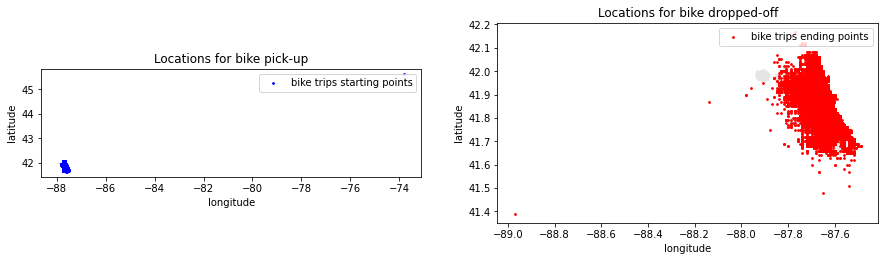

In [23]:
def validate_coordinates() -> None:
    start_c = df[['start_lng','start_lat']]
    end_c = df[['end_lng','end_lat']]
    geometry_start = [Point(xy) for xy in zip(start_c['start_lng'], start_c['start_lat'])]
    geometry_end = [Point(xy) for xy in zip(end_c['end_lng'], end_c['end_lat'])]
    gdf1 = GeoDataFrame(start_c, geometry = geometry_start)
    gdf2 = GeoDataFrame(end_c, geometry = geometry_end)
               
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,15))
        
    chicago = gpd.read_file('geo_export_15deee7d-207e-4de1-9ee3-f83772a73e31.shp')
    
    chicago.plot(ax = ax1, alpha = 0.5, color = 'grey')
    gdf1.plot(ax = ax1, markersize = 3, color = 'blue', marker = 'o', label = 'bike trips starting points')
    chicago.plot(ax = ax2, alpha = 0.2, color = 'grey')
    gdf2.plot(ax = ax2, markersize = 3, color = 'red', marker = 'o', label = 'bike trips ending points')
    
    ax1.set(xlabel = 'longitude', ylabel ='latitude')
    ax1.set_title('Locations for bike pick-up')
    ax2.set(xlabel = 'longitude', ylabel ='latitude')
    ax2.set_title('Locations for bike dropped-off')
    ax1.legend(loc = 'upper right')
    ax2.legend(loc = 'upper right')
    

validate_coordinates()   
    

From this representation we can already seen there is at least two points that are clearly out of boundaries. Let's identify those points. 


In [24]:
# Since only the coordinates are numeric values, let's take a look at some statistics:
df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,start_lat,start_lng,end_lat,end_lng
count,5306324.000,5306324.000,5301747.000,5301747.000
mean,41.899,-87.647,41.899,-87.648
std,0.047,0.031,0.047,0.031
min,41.640,-87.840,41.390,-88.970
25%,41.881,-87.662,41.881,-87.662
50%,41.897,-87.644,41.898,-87.644
75%,41.926,-87.629,41.929,-87.630
max,45.635,-73.796,42.168,-87.490


In [25]:
latitude_df = df.sort_values(by='start_lat', ascending=False)
latitude_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
4363009,3327172413547F64,electric_bike,2022-01-14 11:13:15,2022-01-14 11:15:50,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,45.635034,-73.796477,41.8646,-87.681,casual
3599948,F1E10B3A48E39AF2,electric_bike,2021-10-10 08:57:17,2021-10-10 09:08:14,NaN,NaN,NaN,NaN,42.070000,-87.700000,42.0700,-87.680,member
3109855,C8FC9870235555FE,electric_bike,2021-09-11 12:14:33,2021-09-11 12:21:57,NaN,NaN,NaN,NaN,42.070000,-87.700000,42.0800,-87.720,casual
2169045,1608C43417B469AD,electric_bike,2021-08-01 15:35:29,2021-08-01 15:41:13,NaN,NaN,NaN,NaN,42.070000,-87.730000,42.0600,-87.730,casual
3596337,7B0B20824FA28B53,electric_bike,2021-10-02 14:12:23,2021-10-02 14:31:38,NaN,NaN,NaN,NaN,42.070000,-87.680000,42.0500,-87.680,member


In [26]:
longitude_df = df.sort_values(by='end_lng')
longitude_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
4046035,9F438AD0AB380E3F,electric_bike,2021-11-09 06:47:52,2021-11-09 07:42:56,Narragansett & McLean,309,NaN,NaN,41.920000,-87.790000,41.39,-88.97,casual
5813899,353B37694B30396F,electric_bike,2022-05-19 10:09:39,2022-05-19 13:03:55,Dearborn St & Adams St,TA1305000005,NaN,NaN,41.878811,-87.629584,41.87,-88.14,member
4063374,7C7658F5014F953C,electric_bike,2021-11-19 19:34:15,2021-11-19 21:07:38,NaN,NaN,NaN,NaN,41.910000,-87.750000,41.90,-87.98,casual
4099108,6B23D945AFAC7B24,electric_bike,2021-11-15 12:27:52,2021-11-15 13:59:43,NaN,NaN,NaN,NaN,41.920000,-87.750000,41.90,-87.98,casual
3613359,95AA4A18E0B47FCF,electric_bike,2021-10-02 19:35:18,2021-10-02 21:36:57,NaN,NaN,NaN,NaN,41.930000,-87.670000,41.93,-87.96,member


Since there are only two points let's get rid of them already.

In [27]:
df = df[df['start_lng']<-87]
df = df[df['end_lng']>-88]

Now we have got rid of those points that are clearly out of boundaries. Please note, that with this statement we also got rid of those values with Null values for coordinates. We want to do this since the bikes are geotracked and if there is not a value, the ride would not be representative and we do not want this in our analysis.

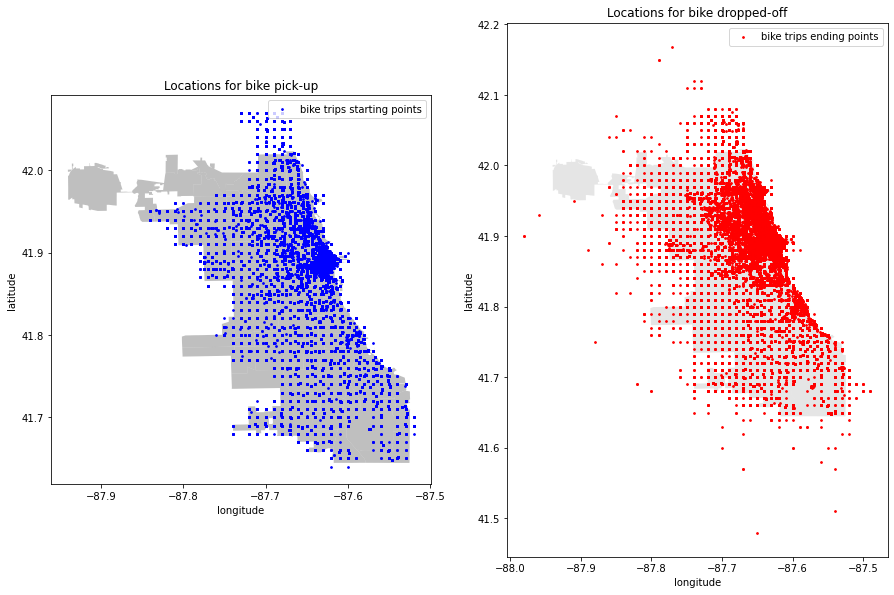

In [28]:
validate_coordinates()

This looks a lot better now. We can already see some tendencies here, as the bikes seem to be picked up from actual docking stations in Chicago, and they have sometimes being dropped off outside the limits of Chicago yet still close. We will work with this data.

#### Checking for inconsistent data

Every row represents one ride, and the only source for inconsistent data would be the time of the ride. Let's add another column to our dataframe with the trip duration

In [29]:
df['trip_duration'] = df['ended_at'] - df['started_at']
sorted_td = df.sort_values(by='trip_duration')
rsorted_td = df.sort_values(by='trip_duration', ascending = False)
sorted_td.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
3800451,7CA158F5F050156E,electric_bike,2021-11-07 01:58:08,2021-11-07 01:00:06,Halsted St & Dickens Ave,13192,NaN,NaN,41.920020,-87.648990,41.930000,-87.650000,casual,-1 days +23:01:58
3885821,FD8AF7324ABAE9DA,electric_bike,2021-11-07 01:56:51,2021-11-07 01:00:57,Clark St & North Ave,13128,Larrabee St & Webster Ave,13193,41.911738,-87.632145,41.921762,-87.644034,casual,-1 days +23:04:06
3869585,508B09A5FB0737DC,classic_bike,2021-11-07 01:54:50,2021-11-07 01:00:45,Sedgwick St & Webster Ave,13191,Sedgwick St & North Ave,TA1307000038,41.922167,-87.638888,41.911386,-87.638677,member,-1 days +23:05:55
4004550,6F9E76F5EDAAC1B8,electric_bike,2021-11-07 01:55:42,2021-11-07 01:01:55,Milwaukee Ave & Wabansia Ave,13243,Western Ave & Division St,13241,41.912580,-87.681424,41.902906,-87.687367,member,-1 days +23:06:13
4026403,7AECC76D1562B51C,classic_bike,2021-11-07 01:54:58,2021-11-07 01:01:29,Sheffield Ave & Wrightwood Ave,TA1309000023,Southport Ave & Wellington Ave,TA1307000006,41.928712,-87.653833,41.935733,-87.663576,casual,-1 days +23:06:31


In [30]:
rsorted_td.head(120)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
595683,F043F0F6A1AA4F85,docked_bike,2021-06-05 02:27:26,2021-07-13 22:51:35,Michigan Ave & Lake St,TA1305000011,Malcolm X College Vaccination Site,631,41.886024,-87.624117,41.877618,-87.673895,casual,38 days 20:24:09
745629,89F33397EABB55E7,docked_bike,2021-07-08 15:13:08,2021-08-06 13:18:39,Streeter Dr & Grand Ave,13022,Calumet Ave & 33rd St,13217,41.892278,-87.612043,41.834900,-87.617930,casual,28 days 22:05:31
1744716,E25E58F5E94EE351,docked_bike,2021-08-01 18:53:10,2021-08-30 16:42:20,Michigan Ave & Jackson Blvd,TA1309000002,Daley Center Plaza,TA1306000010,41.877850,-87.624080,41.884241,-87.629634,casual,28 days 21:49:10
1060985,D4E35EE211346690,docked_bike,2021-07-10 15:59:21,2021-08-07 22:43:57,Dusable Harbor,KA1503000064,Warren Park East,RP-002,41.886976,-87.612813,42.004550,-87.680666,casual,28 days 06:44:36
3473058,A310C7270FD730B6,docked_bike,2021-10-02 18:35:36,2021-10-31 01:00:37,Dusable Harbor,KA1503000064,Wells St & Elm St,KA1504000135,41.886976,-87.612813,41.903222,-87.634324,casual,28 days 06:25:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165825,8ADEB58587BCCEBD,docked_bike,2021-12-19 14:26:48,2021-12-26 15:30:40,Western Blvd & 48th Pl,594,May St & Cullerton St,13331,41.805661,-87.683392,41.855136,-87.654127,casual,7 days 01:03:52
1078005,FCC71F4202BCF6E8,docked_bike,2021-07-30 23:39:47,2021-08-06 23:09:05,Lincoln Ave & Addison St,TA1309000050,Monticello Ave & Irving Park Rd,KA1504000139,41.946176,-87.673308,41.954005,-87.719128,casual,6 days 23:29:18
178595,AECFDE4080DB4B4C,docked_bike,2021-06-17 18:01:14,2021-06-24 15:51:24,Fort Dearborn Dr & 31st St,TA1307000048,Rhodes Ave & 32nd St,13215,41.838556,-87.608218,41.836208,-87.613533,casual,6 days 21:50:10
805348,8E9FCC1F318140D4,docked_bike,2021-07-04 16:42:40,2021-07-11 14:19:17,Sheridan Rd & Montrose Ave,TA1307000107,Damen Ave & Leland Ave,TA1307000158,41.961670,-87.654640,41.967094,-87.679028,casual,6 days 21:36:37


As we can see there are trips with inconsistent trip durations. There can not be trips ending before starting, and all of the trips longer than a day comes from casual users, which can't be possible due to their usage. Let's get ride of these inconsistent values. 

(**Note**: There will be trips lasting almost a day, but since that could be possible we will not delete them. It is hard to establish what is a reasonable usage of the bikes. Some users might get the pass and try to use it all they can. That's why we will stick to delete only the values for more than a day).

In [31]:
df = df[df['trip_duration']>np.timedelta64(timedelta(days=0))]
df = df[df['trip_duration']<np.timedelta64(timedelta(days=1))]

In [32]:
sorted_td = df.sort_values(by='trip_duration')
rsorted_td = df.sort_values(by='trip_duration', ascending = False)
rsorted_td.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
4966498,0AB04BB3CAA0FCD0,classic_bike,2022-04-24 02:37:25,2022-04-25 02:36:00,Ellis Ave & 55th St,KA1504000076,Elizabeth St & 59th St,647,41.794301,-87.601450,41.789697,-87.654698,casual,0 days 23:58:35
517041,45A37F50CBEA6B1B,docked_bike,2021-06-05 07:26:41,2021-06-06 07:24:40,Yates Blvd & 75th St,KA1503000024,Yates Blvd & 75th St,KA1503000024,41.758768,-87.566440,41.758768,-87.566440,casual,0 days 23:57:59
5391337,572A0A83B2979D9B,classic_bike,2022-05-07 17:32:31,2022-05-08 17:30:13,Clark St & Grace St,TA1307000127,Lincoln Ave & Sunnyside Ave,TA1307000156,41.950780,-87.659172,41.963004,-87.684781,casual,0 days 23:57:42
2481636,57593C5CB61F881B,classic_bike,2021-09-15 11:51:44,2021-09-16 11:49:11,Carpenter St & Huron St,13196,Clybourn Ave & Division St,TA1307000115,41.894556,-87.653449,41.904613,-87.640552,casual,0 days 23:57:27
37320,8BDDD73BCD395A3C,docked_bike,2021-06-05 07:27:14,2021-06-06 07:24:32,Yates Blvd & 75th St,KA1503000024,Yates Blvd & 75th St,KA1503000024,41.758768,-87.566440,41.758768,-87.566440,casual,0 days 23:57:18


### Transforming dataset

#### Adding practical columns

While checking for inconsistent data, we have already added the column 'trip_duration'. For analysis, we will rather have it in minutes. 

On the other hand, we will also add the following columns:

- "distance": the distance ridden for every trip.
- "day_of_week": the day of the week when the bike was picked up. 

In [33]:
def distance(x1, y1, x2, y2):
    d = ((x2-x1)**2 +(y2-y1)**2)**(1/2)* 111.32 #for value in km (note that coordinates measure a sphere and we are calculating like if it was a plane)
    return d

In [34]:
df['trip_duration'] = df['trip_duration']/np.timedelta64(1, 'm')
df['distance'] = distance(df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng'])
df['day_of_week'] = df['started_at'].dt.strftime('%A')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5300385 entries, 0 to 5860775
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
 13  trip_duration       float64       
 14  distance            float64       
 15  day_of_week         object        
dtypes: category(2), datetime64[ns](2), float64(6), object(6)
memory usage: 616.7+ MB


Now that our dataset is ready for analysis, let's save our process data into a new CSV file. 

In [36]:
df.to_csv('Cyclistic_processed_data.csv')

## 4. Analyze the data

Now that our data is clean and formatted they way we want let's get some insights.

### Total amount of bike rides

In [37]:
df.groupby('member_casual')['ride_id'].count() #The column is not neccesary, but we include it for clarity

member_casual
casual    2255632
member    3044753
Name: ride_id, dtype: int64

There are more members than casual users, representing around 57% of the total usage of the Cyclist bikes.

### Bike types for members and casuals

In [38]:
df.groupby('member_casual')['rideable_type'].value_counts()

member_casual               
casual         classic_bike     1058638
               electric_bike     971080
               docked_bike       225914
member         classic_bike     1793265
               electric_bike    1251488
               docked_bike            0
Name: rideable_type, dtype: int64

- It is remarkable that no members use the docked bikes. 
- Electric bikes are chosen proportional to the total use. Around 57 % of electric bike rides are from members.
- Classic bikes are members favourite choice, representing around 63 % of classic bike trips, as well as 59 % of all members rides.

### Bike rides throughout the year

In [39]:
df = df.set_index(['started_at'])
# converting index to datetime index
df.index = pd.to_datetime(df.index)
df.groupby([pd.Grouper(freq='M'), 'member_casual']).agg(total_quantity=('ride_id', 'count')).head

<bound method NDFrame.head of                           total_quantity
started_at member_casual                
2021-06-30 casual                 320880
           member                 324263
2021-07-31 casual                 382605
           member                 343344
2021-08-31 casual                 358928
           member                 353499
2021-09-30 casual                 322417
           member                 358242
2021-10-31 casual                 233106
           member                 349602
2021-11-30 casual                  98512
           member                 239497
2021-12-31 casual                  64399
           member                 168437
2022-01-31 casual                  17343
           member                  80833
2022-02-28 casual                  19861
           member                  89090
2022-03-31 casual                  80414
           member                 182433
2022-04-30 casual                 113206
           member          

We can see from the results that bikes are used more often on the summer months, for both casual and member users. However, the members use is a lot more even throughout the year.
On winter months, there is almost no use for the casual users.

### Bike rides throughout the week

In [40]:
df.groupby('member_casual')['day_of_week'].value_counts()

member_casual  day_of_week
casual         Saturday       474073
               Sunday         407158
               Friday         322456
               Thursday       275686
               Monday         266058
               Tuesday        255389
               Wednesday      254812
member         Tuesday        487784
               Wednesday      475758
               Thursday       466416
               Monday         431025
               Friday         427658
               Saturday       399698
               Sunday         356414
Name: day_of_week, dtype: int64

This seems a determining factor on how members and casuals use Cyclist bikes differently. 
- For casuals, there is a great difference between weekends and weekdays.
- Members use the bikes very evenly throughtout the week and with a slight decrease during the weekends. 


### Ride times and distances

In [41]:
df.groupby('member_casual')['trip_duration'].mean()

member_casual
casual    24.488927
member    12.436780
Name: trip_duration, dtype: float64

In [42]:
df.groupby('member_casual')['distance'].mean()

member_casual
casual    2.528272
member    2.316465
Name: distance, dtype: float64

Casuals spend, on average, twice as much as time for every ride they take. However, the traveled distance is approximately the same. 

In [43]:
df['trip_duration'].isnull()

started_at
2021-06-13 14:31:28    False
2021-06-04 11:18:02    False
2021-06-04 09:49:35    False
2021-06-03 19:56:05    False
2021-06-04 14:05:51    False
                       ...  
2022-05-27 22:00:02    False
2022-05-15 16:05:39    False
2022-05-21 10:10:13    False
2022-05-12 07:53:58    False
2022-05-11 21:14:28    False
Name: trip_duration, Length: 5300385, dtype: bool

## 5. Share the key points with visualizations

Visualizations is usually the best way to get the insight of the results. We can see now some graphs about the usage of the bikes for casuals and members.

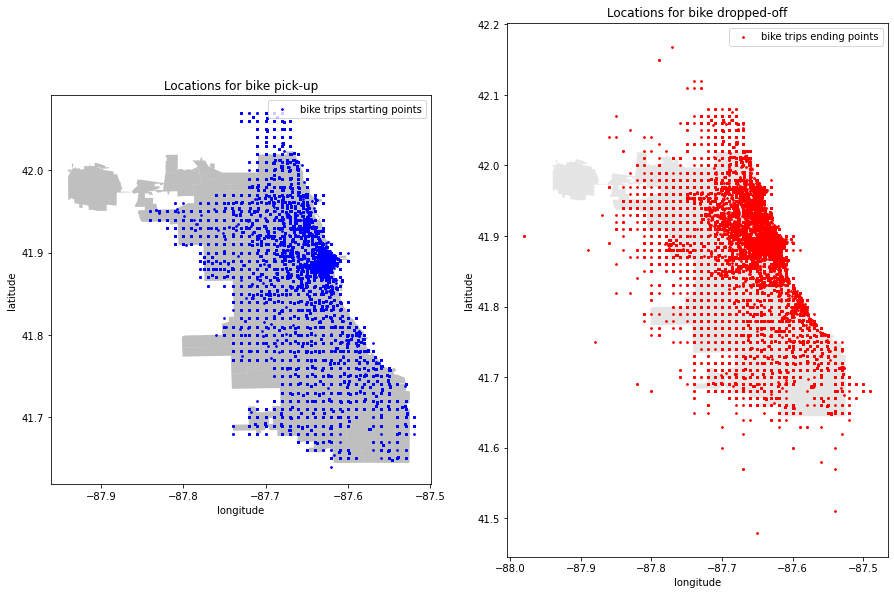

In [44]:
def coordinates_casual() -> None:
    filter = df["member_casual"]=='casual'
    start_c = df[['start_lng','start_lat']].where(filter)
    end_c = df[['end_lng','end_lat']].where(filter)
    geometry_start = [Point(xy) for xy in zip(start_c['start_lng'], start_c['start_lat'])]
    geometry_end = [Point(xy) for xy in zip(end_c['end_lng'], end_c['end_lat'])]
    gdf1 = GeoDataFrame(start_c, geometry = geometry_start)
    gdf2 = GeoDataFrame(end_c, geometry = geometry_end)
               
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,15))
        
    chicago = gpd.read_file('geo_export_15deee7d-207e-4de1-9ee3-f83772a73e31.shp')
            
    chicago.plot(ax = ax1, alpha = 0.5, color = 'grey')
    gdf1.plot(ax = ax1, markersize = 3, color = 'blue', marker = 'o', label = 'bike trips starting points')
    chicago.plot(ax = ax2, alpha = 0.2, color = 'grey')
    gdf2.plot(ax = ax2, markersize = 3, color = 'red', marker = 'o', label = 'bike trips ending points')
    
    ax1.set(xlabel = 'longitude', ylabel ='latitude')
    ax1.set_title('Locations for bike pick-up')
    ax2.set(xlabel = 'longitude', ylabel ='latitude')
    ax2.set_title('Locations for bike dropped-off')
    ax1.legend(loc = 'upper right')
    ax2.legend(loc = 'upper right')
    

coordinates_casual()   

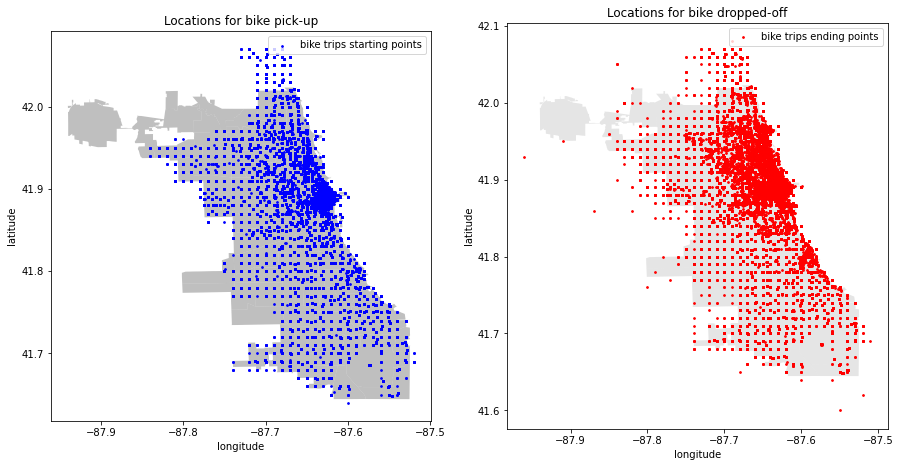

In [45]:
def coordinates_member() -> None:
    filter = df["member_casual"]=='member'
    start_c = df[['start_lng','start_lat']].where(filter)
    end_c = df[['end_lng','end_lat']].where(filter)
    geometry_start = [Point(xy) for xy in zip(start_c['start_lng'], start_c['start_lat'])]
    geometry_end = [Point(xy) for xy in zip(end_c['end_lng'], end_c['end_lat'])]
    gdf1 = GeoDataFrame(start_c, geometry = geometry_start)
    gdf2 = GeoDataFrame(end_c, geometry = geometry_end)
               
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,15))
        
    chicago = gpd.read_file('geo_export_15deee7d-207e-4de1-9ee3-f83772a73e31.shp')
            
    chicago.plot(ax = ax1, alpha = 0.5, color = 'grey')
    gdf1.plot(ax = ax1, markersize = 3, color = 'blue', marker = 'o', label = 'bike trips starting points')
    chicago.plot(ax = ax2, alpha = 0.2, color = 'grey')
    gdf2.plot(ax = ax2, markersize = 3, color = 'red', marker = 'o', label = 'bike trips ending points')
    
    ax1.set(xlabel = 'longitude', ylabel ='latitude')
    ax1.set_title('Locations for bike pick-up')
    ax2.set(xlabel = 'longitude', ylabel ='latitude')
    ax2.set_title('Locations for bike dropped-off')
    ax1.legend(loc = 'upper right')
    ax2.legend(loc = 'upper right')
    

coordinates_member()   

More visualizations have been made in [Tableau](https://public.tableau.com/app/profile/alberto4473/viz/CyclisticBikeShare_16576236423730/Historia1?publish=yes).


### Trends and relationships

#### Common for casual riders and annual members:

- They barely use Cyclistic bikes during colder months.
- Distance ridden is roughly the same. 
- Tend to end the trip near the bay area.

#### Annual members

- Most active during conmuting hours on weekdays.
- Ride more bikes in summer months, but somewhat evenly spread across the year.
- Use more classic bikes.
- Preference for electric bikes is growing.
- Do not use docked bikes at all.

#### Casual riders

- Ride more bikes on weekends.
- Tend to be more active during late afternoon and evenings.
- Ride bikes mostly in summer months. 
- Ride all 3 kinds of bycicles, with similar use for electric and classic bikes.
- Take longer bike trips and mostly docked bike users.

### Findings summary

We have conducted a quantitative analysis based on completely anonymous data. Our analysis has revealed some important behavioural aspects defining both kind of users, casual riders and annual members. Some differences in the use of the bikes have arised. 

However, we did not have data to answer **why** do each kind of user choose each kind of pass. Moreover, there are two kind of casual riders, single-ride and full-day pass, while our data did not differentiate between both kinds. There are not data about casual users reiterating on each kind of pass, or if a casual user ever turned into an annual member. For a better analysis and to conduct the best marketing strategy, a qualitative analysis should be conducted. 

For now, let's see what hypothesis can be arised from the analysis conducted.

#### Speculations and hypothesis

Annual members ride more bikes for commuting to work. Yet, they get use of their pass by utilizing it for leisure too. 
This assumptions are made based on the following facts:
- There is a peak in commuting hours for members bike rides.
- The use during every day of the week is about the same. 
- Members bike rides all along the year, even if they prefer warm weather. 

On the other hand, casual riders tend to use Cyclistic bikes mostly for leisure. To back up our assumption we have the following facts:
- Use bikes a lot more during weekends. 
- Barely use the bikes during mornings. 
- Use bikes mostly on summer with almost no use during winter months.
- Spend extra time for getting to their destination. This seems to be either because they do not know how to get to their wish destination or because they want to take extra time to enjoy the ride.
- Are attracted when they see docked bike stations. Annual members also have access to docked bikes, yet prefer the other bikes 100 % of the time. This means that casuals might get attracted by docked bike stations and might want to take a ride even if docked bikes are not the best option.
- Are more likely to get into a bike when they start to see them riding around town. The peak for casuals is also at 5-6 pm, which is the time where more people are riding overall. At 5 pm people are commuting back from work and more bikes are ridden over all.

## 6. Act on key findings

### NEXT STEPS

### Option A: Conduct a supportive qualitative analysis

Like we have stated before, our analysis can only show how do members and casual riders use the bikes. However, there are many other factors that could help understand why they choose it. It would be very useful to know if casuals could use more than once a single-ride pass. 

For a qualitative analysis, I would collect the data in two different ways:

- Conduct a survey among users. 
- Make an app to get all kind of passes (single-ride, day pass or annual membership).

In the survey, we would need to know:
- How did they know Cyclistic.
- Why they did use it for the first time.
- Have they use it more than once? Are they members or casuals?
- For casuals: What is keeping them from getting the annual membership?
- For members: What were the reasons to make them choose the annual membership?

With the app, we would get to know the following points:
- Casuals that get one or more passes (leissure is usually done with more people).
- A zipcode to know where are they from (both inside Chicago and outside Chicago).
- How many times do the same user gets a bike. 
- If any casual ever switched to an annual membership.

Moreover, the app would be a great source for promotioning annual memberships, since users would see how much more cost effective it could get.


### Option B: Design a marketing strategy

We have already uncover some differences on how casuals and members ride Cyclistic bikes. Unfortunately, further research might take some extra time and resources and is not always the best option. 

If a certain level of risk is acceptable, we could move forward to start a few strategies. Let's see what possibilities could arise from our findings:

#### Design more plans and benefits

Right now, there are only three type of passes:
- Single-ride pass
- Day pass
- Annual membership

We could implement the following benefits:

- **Reservations**: As we have seen, the peak hour for casuals is at 5-6 pm which is exactly when most members are commuting back from work. Reservations could be implemented so that members could reserve the type of bike they want an hour ahead. As with any other routine, members would be more likely to repeat the same bike, and a reservation for a close bike that they like could be very handy for some users. The reservations could be part of a higher-priced pass, as well as a reward for specific ocasions like birthdays, first-time purchases of annual memberships or bringing a friend to annual membership. Also, this benefit could be purchased individually in case it wants to be purchased on specific ocasions. 

- **"Invite a friend"**: This would only be a reward for specific ocasions, like birthdays or first-time purchase of the annual membership. With this ride, members could invite a friend to ride with them once. This benefit will give the visibility to Cyclistic bikes and riding with friends to more people. 

With that in mind we could introduce two extra types of passes:
- **Weekend pass**: The fact that the annual membership has to be paid upfront might be a limitation for some users. Therefore, a plan for leisure riders could be given to be a bit cheaper than the whole annual membership. This pass will give them access to unlimited bike rides during weekends all year long, with price being around 60 % of total annual membership. As most members also use the pass to commute it will not decrease the amount of standard memberships, while increasing the stability for passes year long. 

- **Gold pass**: This pass would give you the access to a reservation once a day. It should cost around twice as much as standard membership, since that bike would not be ridden for an hour. It would also come with **"Invite a friend"** for three times a year. 

#### Encourage users to ride more frequently

Using bikes bring a lot of benefits, from being more healthy and doing exercise, to avoid the annoying traffic, passing by being more environmentally friendly. A campaign where people is informed on these benefits and encouraging them to take bikes might be very useful. The best places to focus on this strategy would be near the bay area, as we have seen most bikes are picked up and dropped of on that area.

At that point, a rewarding option to take again the bike would be beneficial. Let's say like a second day pass with a 20% discount for the next 15 days. This way, casual riders will be encouraged to take the bike again. If they start feeling first-hand the advantages of riding bikes, it will be more likely that they will convert into annual members. 

## Additional considerations

If further analysis is considered, additional resources would be very handy. Data could be arised from most frequent stations and amount of bikes on those stations during the day. Relationships between rides and weather, i.e., how does precipitation, temperature or humidity levels affect the amount and length of the rides.

Additionaly, all data was completely anonymous since it is a public dataset and privacy must be asured. However, if the actual company would perform the analysis extra information could be given to the analyst as long as they make sure that privacy would not be compromised outside of the study in case. Profiles for each kind of user could be better analyzed with that data.

Also, if the mobile app is developed as suggested, much more data could be analyzed to better understand the behaviour of both annual members and casual riders.